# Can wine reviews predict the variety of wine?

Can we use reviews of wine to predict their variety, the type of grape used to make the wine (ie Pinot Noir)?
Many sommeliers use flavors to tell what kind of wine they are tasting, and different wines have distinct flavors. If we get flavors of the wine from a review do those match with the wine variety that they are label with?

I found the dataset of wine reviews from Kaggle:
https://www.kaggle.com/zynicide/wine-reviews



In [1]:
# Create imports of libraries, and functions to use
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import iqr
import numpy as np
import seaborn as sns

1. Read in dataset downloaded from kaggle. https://www.kaggle.com/zynicide/wine-reviews

Look at the shape of the data

In [148]:
df = pd.read_csv('winemag-data-130k-v2.csv', index_col = 0)
df.shape

(129971, 13)

The original dataset is 129,971 rows and 13 columns 

Find the datatypes of the columns

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


### Data Dictionary
- **country** [String] The country that the wine is from.
- **description** [FEATURE] [String] The description of the wine
- **designation** [String] The vineyard within the winery where the grapes that made the wine are from
- **points** [int]The number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)
- **price** [float]The cost for a bottle of the wine
- **province** [String] The province or state that the wine is from
- **region_1** [String] The wine growing area in a province or state (ie Napa)
- **region_2** [String] Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank
- **taster_name** [String] Name of the reviewer
- **taster_twitter_handle** [String] Social media handle
- **title** [String] The title of the wine review, which often contains the vintage if you're interested in extracting that feature
- **variety** [TARGET][String] The type of grapes used to make the wine (ie Pinot Noir)
- **winery** [String] The winery that made the wine

In [150]:
# Look at the top of the table
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


What does the distribution of price look like?

In [151]:
df.price.describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


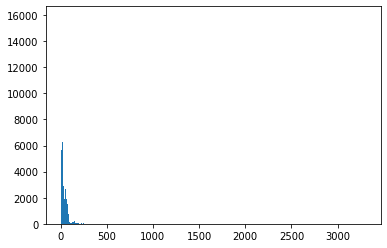

In [152]:
plt.hist(df.price, bins = 1000)
plt.show()

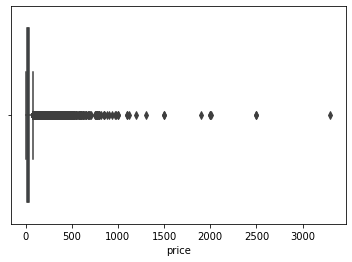

In [153]:
sns.boxplot(df.price)

Looks like there are outliers in price because the 3rd quartile of our wines are $42, and we have a very expensive wine that is 3300. We are going to make our data for our average wines not those that are only tasted by a select few. We will do this by creating a upper fence using the inter quartile range.

In [154]:
df.price.value_counts(dropna=False).head()

NaN     8996
20.0    6940
15.0    6066
25.0    5805
30.0    4951
Name: price, dtype: int64

There are 8996 wines that do not have a price label

In [155]:
iqr_price = iqr(df[['price']].dropna().price)
iqr_price

25.0

In [156]:
third_quantile = np.quantile(df[['price']].dropna().price, .75)
third_quantile

42.0

In [157]:
upper_fence = third_quantile + 3*iqr_price
upper_fence

117.0

Our upper fence will be wines that are max $117

We will create a NEW dataframe that only contains wines less than $117

In [158]:
df = df[df.price <= upper_fence]

In [159]:
df.price.describe()

count    118299.000000
mean         31.541399
std          20.052396
min           4.000000
25%          17.000000
50%          25.000000
75%          40.000000
max         117.000000
Name: price, dtype: float64

Our new maximum is now $117, inside the upper fence.

In [160]:
df.shape

(118299, 13)

From df.shape we can see that the new dataframe dropped 10,000+ rows

Text(0, 0.5, 'count')

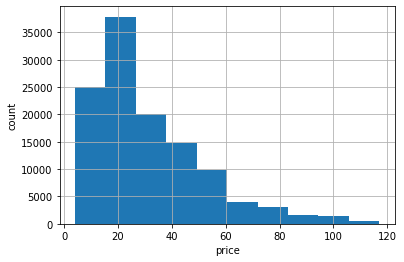

In [161]:
df.price.hist()
plt.xlabel('price')
plt.ylabel('count')

How many tasters are in the dataset?

In [162]:
df.taster_name.nunique()

19

Who are the top 5% of tasters?

Text(0, 0.5, 'Count of Reviews')

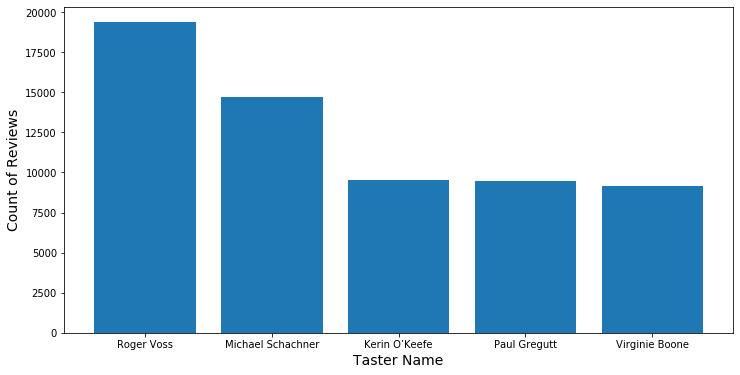

In [163]:
top_five_tasters = pd.DataFrame(df.taster_name.value_counts()).rename(columns = {'taster_name':'count'})[0:5]


plt.figure(figsize = (12,6))
plt.bar(x = top_five_tasters.index.values, height = top_five_tasters['count'])
plt.xlabel('Taster Name', size = 14)
plt.ylabel('Count of Reviews', size = 14)

In [164]:
top_five_tasters

,count
Roger Voss,19368
Michael Schachner,14699
Kerin O’Keefe,9545
Paul Gregutt,9457
Virginie Boone,9133


What variety's of wine are in our dataset?

In [165]:
df[df.variety.isna()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
86909,Chile,"A chalky, dusty mouthfeel nicely balances this...",NaN,88,17.0,Maipo Valley,NaN,NaN,NaN,NaN,Carmen 1999 (Maipo Valley),NaN,Carmen


There is one row in the dataframe where the variety of wine is NaN this means that it would not have label to predict so we will drop it from our dataset.

In [166]:
df.drop(df[df.variety.isna()].index, inplace = True)

In [167]:
df[df.variety.isna()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery


How many different varieties of wine are in the dataset?

In [168]:
df.variety.nunique()

693

What does the distribution of wine variety counts look like?

In [169]:
df.variety.value_counts()

Pinot Noir                      12484
Chardonnay                      10895
Cabernet Sauvignon               8793
Red Blend                        8307
Bordeaux-style Red Blend         5044
Riesling                         4894
Sauvignon Blanc                  4782
Syrah                            4025
Rosé                             3260
Merlot                           3026
Zinfandel                        2708
Malbec                           2538
Sangiovese                       2271
Portuguese Red                   2180
Nebbiolo                         2175
White Blend                      2165
Sparkling Blend                  2010
Tempranillo                      1745
Pinot Gris                       1388
Rhône-style Red Blend            1386
Cabernet Franc                   1284
Grüner Veltliner                 1142
Champagne Blend                  1065
Pinot Grigio                     1002
Portuguese White                  986
Viognier                          979
Gewürztramin

We are going to drop from the data set all of the wines that have a count of 1, because we want to train our predictive model using a greater sample size of reviews.

To look at a good sample size for the model, what if we use wines that have at least 100 reviews?

In [170]:
(df.variety.value_counts() > 100).sum()

88

This takes our wine count from 693 varieties to 88. 

To start with let's try to predict varieties that are in the top 10 value counts.

In [171]:
top_ten_variety = df.variety.value_counts()[0:11].index.values

Create a new dataset that only contains these varieties of wine.

In [172]:
df = df[df.variety.isin(top_ten_variety)]
df.shape

(68218, 13)

Did this have an effect on the distribution of price?

In [173]:
df.price.describe()

count    68218.000000
mean        33.437069
std         20.372339
min          4.000000
25%         18.000000
50%         28.000000
75%         45.000000
max        117.000000
Name: price, dtype: float64

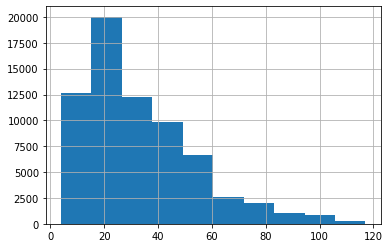

In [174]:
df.price.hist()

Price distibution stayed relatively the same.

Are the top five tasters the same?

Text(0, 0.5, 'count')

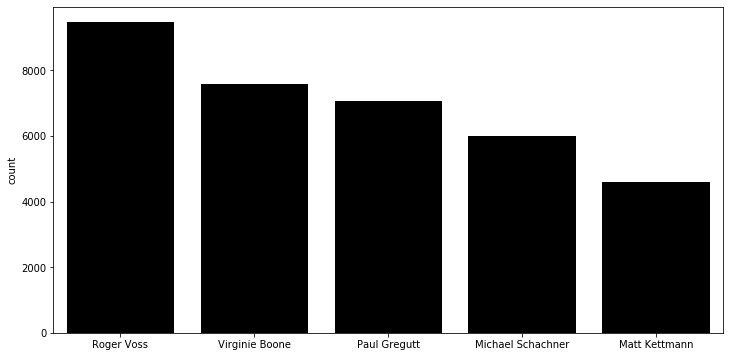

In [175]:
plt.figure(figsize = (12,6))
sns.barplot(df.taster_name.value_counts()[0:5].index, df.taster_name.value_counts()[0:5], color = 'black'),
plt.ylabel('count')

How many countries are the wines from?

In [176]:
df.country.nunique()

40

In [177]:
df.country.value_counts()

US                40898
France            10147
Italy              3942
Chile              3313
Germany            1761
Argentina          1457
New Zealand        1267
Spain              1156
Australia          1116
Austria             870
South Africa        768
Israel              345
Portugal            340
Canada              164
Greece              117
Bulgaria            110
Romania              82
Mexico               43
Uruguay              35
Turkey               35
Slovenia             35
Moldova              30
Hungary              23
England              23
Brazil               22
Lebanon              22
Morocco              20
Croatia              10
Peru                  7
Serbia                6
Ukraine               6
Georgia               5
Czech Republic        5
Macedonia             5
Cyprus                3
India                 2
Luxembourg            2
Switzerland           1
Slovakia              1
Armenia               1
Name: country, dtype: int64

In [178]:
df.points.nunique()

21

In [179]:
df.points.value_counts().sort_index()

80      223
81      428
82     1122
83     1710
84     3643
85     5025
86     6383
87     8545
88     8637
89     6031
90     8263
91     6379
92     5296
93     3583
94     1965
95      692
96      209
97       60
98       16
99        6
100       2
Name: points, dtype: int64

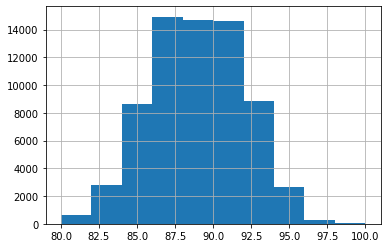

In [180]:
df.points.hist()

In [181]:
df.province.nunique()

324

In [182]:
df.region_1.nunique()

858

In [183]:
df.region_2.nunique()

17

<BarContainer object of 6 artists>

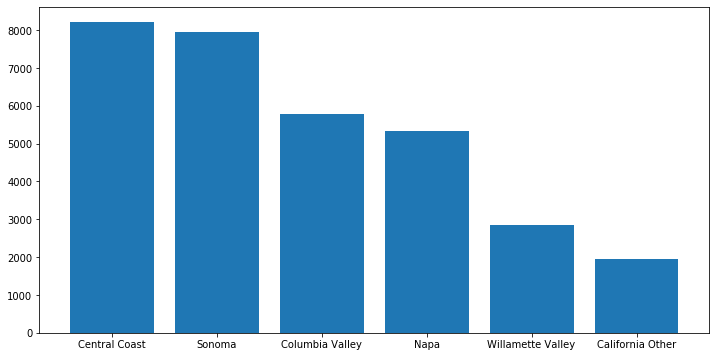

In [184]:
plt.figure(figsize = (12,6))
plt.bar(x = df.region_2.value_counts()[0:6].index, height = df.region_2.value_counts()[0:6].values)

In [185]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
14,US,Building on 150 years and six generations of w...,NaN,87,12.0,California,Central Coast,Central Coast,Matt Kettmann,@mattkettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou


In [191]:
# Reset the index column to start-over
df.reset_index(inplace = True)

In [192]:
df.drop(columns = ['index'], inplace = True)

In [193]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
1,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
2,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
3,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
4,US,Building on 150 years and six generations of w...,NaN,87,12.0,California,Central Coast,Central Coast,Matt Kettmann,@mattkettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68218 entries, 0 to 68217
Data columns (total 13 columns):
country                  68195 non-null object
description              68218 non-null object
designation              47294 non-null object
points                   68218 non-null int64
price                    68218 non-null float64
province                 68195 non-null object
region_1                 58661 non-null object
region_2                 38251 non-null object
taster_name              53025 non-null object
taster_twitter_handle    49622 non-null object
title                    68218 non-null object
variety                  68218 non-null object
winery                   68218 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 6.8+ MB


In [195]:
df.variety.value_counts()

Pinot Noir                  12484
Chardonnay                  10895
Cabernet Sauvignon           8793
Red Blend                    8307
Bordeaux-style Red Blend     5044
Riesling                     4894
Sauvignon Blanc              4782
Syrah                        4025
Rosé                         3260
Merlot                       3026
Zinfandel                    2708
Name: variety, dtype: int64

In [196]:
df[['designation', 'title']]

,designation,title
0,Reserve Late Harvest,St. Julian 2013 Reserve Late Harvest Riesling ...
1,Vintner's Reserve Wild Child Block,Sweet Cheeks 2012 Vintner's Reserve Wild Child...
2,Mountain Cuvée,Kirkland Signature 2011 Mountain Cuvée Caberne...
3,NaN,Louis M. Martini 2012 Cabernet Sauvignon (Alex...
4,NaN,Mirassou 2012 Chardonnay (Central Coast)
5,Devon,Richard Böcking 2013 Devon Riesling (Mosel)
6,Vin de Maison,Quiévremont 2012 Vin de Maison Red (Virginia)
7,NaN,Acrobat 2013 Pinot Noir (Oregon)
8,Signature Selection,Bianchi 2011 Signature Selection Merlot (Paso ...
9,King Ridge Vineyard,Castello di Amorosa 2011 King Ridge Vineyard P...


In [197]:
df.winery.nunique()

11268

# Create a random sample of the dataframe that has an equal representation of all of the wine varieties

In [198]:
df.variety.value_counts()

Pinot Noir                  12484
Chardonnay                  10895
Cabernet Sauvignon           8793
Red Blend                    8307
Bordeaux-style Red Blend     5044
Riesling                     4894
Sauvignon Blanc              4782
Syrah                        4025
Rosé                         3260
Merlot                       3026
Zinfandel                    2708
Name: variety, dtype: int64

In [206]:
df.variety.unique()

array(['Riesling', 'Pinot Noir', 'Cabernet Sauvignon', 'Chardonnay',
       'Red Blend', 'Merlot', 'Sauvignon Blanc',
       'Bordeaux-style Red Blend', 'Rosé', 'Zinfandel', 'Syrah'],
      dtype=object)

In [204]:
min_count = df.variety.value_counts().min()

In [210]:
a = df[0:0]
a

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery


In [215]:
a = df[0:0]
for v in df.variety.unique():
    b = df[df.variety == v].sample(n=min_count, random_state = 123)
    a = pd.concat([a,b])

In [216]:
a.variety.value_counts()

Red Blend                   2708
Bordeaux-style Red Blend    2708
Zinfandel                   2708
Merlot                      2708
Rosé                        2708
Sauvignon Blanc             2708
Syrah                       2708
Riesling                    2708
Cabernet Sauvignon          2708
Chardonnay                  2708
Pinot Noir                  2708
Name: variety, dtype: int64

In [217]:
a.price.describe()

count    29788.000000
mean        30.994595
std         19.076352
min          4.000000
25%         17.000000
50%         25.000000
75%         40.000000
max        117.000000
Name: price, dtype: float64

In [223]:
a.points.value_counts().sort_index()

80      112
81      185
82      545
83      778
84     1782
85     2331
86     2906
87     3778
88     3867
89     2662
90     3621
91     2675
92     2086
93     1394
94      710
95      256
96       77
97       14
98        6
99        2
100       1
Name: points, dtype: int64

In [224]:
import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords


In [231]:
a['description'] = a.description.str.lower()
a.description.head()

5933     fresh and floral on the nose and palate, this ...
67835    notions of ripe, red apple are deliciously per...
28675    musky, floral perfume introduces this bright, ...
35466    both sweet and savory, this delicately scented...
24528    honeysuckle, mineral, honey and botrytis aroma...
Name: description, dtype: object

In [233]:
a['variety'] = a.variety.str.lower()
a.variety.head()

5933     riesling
67835    riesling
28675    riesling
35466    riesling
24528    riesling
Name: variety, dtype: object

In [239]:
def normalize(string):
    return unicodedata.normalize('NFKD', string)\
    .encode('ascii', 'ignore')\
    .decode('utf-8', 'ignore')

In [241]:
a.description.apply(normalize)

5933     fresh and floral on the nose and palate, this ...
67835    notions of ripe, red apple are deliciously per...
28675    musky, floral perfume introduces this bright, ...
35466    both sweet and savory, this delicately scented...
24528    honeysuckle, mineral, honey and botrytis aroma...
17203    while the nose is subdued, the palate of this ...
43574    rich, ripe yellow cherries and honeysuckle waf...
57747    fleshy, intensely ripened pineapple, melon and...
22036    a subtly earthy, dusty minerality mingles into...
14597    layers of pollen, dusty mineral and spice lend...
8112     whiffs of pink grapefruit, guava and blossom e...
37464    the historic dr. konstantin frank winery has l...
30848    despite its 2.4% residual sugar, this is a tar...
25512    though it was picked at 29 brix and fermentati...
113      a thoroughly honest effort, opening with lovel...
55166    this has compelling intensity, with the extra ...
30210    intense lemon and lime-skin aromas add sheen t.